In [2]:
import os
import pandas as pd
%matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ridwan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# import requests

# url = ('http://newsapi.org/v2/everything?'
#        'q=Bitcoin&'
#        'from=2020-11-02&'
#        'sortBy=popularity&'
#        'apiKey=26bfcc03761a4677935c11ba37e48dff')

# response = requests.get(url)

# print (response.json())

In [5]:
# Read your api key environment variable
from newsapi import NewsApiClient
# Init
newsapi = NewsApiClient(api_key='26bfcc03761a4677935c11ba37e48dff')
print(newsapi)

# Lotsa Functions
1. get_sentiment_scores
2. get_sentiments_on_topic
3. sentiment_to_df

In [6]:
# Fetch the Bitcoin news articles
def get_sentiment_scores(text, date, source, url):
    sentiment_scores = {}

    # Sentiment scoring with VADER
    text_sentiment = analyzer.polarity_scores(text)
    sentiment_scores["date"] = date
    sentiment_scores["text"] = text
    sentiment_scores["source"] = source
    sentiment_scores["url"] = url
    sentiment_scores["compound"] = text_sentiment["compound"]
    sentiment_scores["positive"] = text_sentiment["pos"]
    sentiment_scores["neutral"] = text_sentiment["neu"]
    sentiment_scores["negative"] = text_sentiment["neg"]
    if text_sentiment["compound"] >= 0.05:  # Positive
        sentiment_scores["normalized"] = 1
    elif text_sentiment["compound"] <= -0.05:  # Negative
        sentiment_scores["normalized"] = -1
    else:
        sentiment_scores["normalized"] = 0  # Neutral

    return sentiment_scores


In [7]:
def get_sentiments_on_topic(topic):
    """ We loke documentation"""
    sentiments_data = []

    # Loop through all the news articles
    for article in newsapi.get_everything(q=topic, language="en", page_size=100)["articles"]:
        try:
            # Get sentiment scoring using the get_sentiment_score() function
            sentiments_data.append(
                get_sentiment_scores(
                    article["content"],
                    article["publishedAt"][:10],
                    article["source"]["name"],
                    article["url"],
                )
            )

        except AttributeError:
            pass

    return sentiments_data

In [8]:
def sentiment_to_df(sentiments):
    
    # Create a DataFrame with the news articles' data and their sentiment scoring results
    news_df = pd.DataFrame(sentiments)

    # Sort the DataFrame rows by date
    news_df = news_df.sort_values(by="date")

    # Define the date column as the DataFrame's index
    news_df.set_index("date", inplace=True)
    return news_df

# Use the functions

In [10]:
topics = ['Bitcoin', 'Ethereum','Cardano']

btc_sentiment = get_sentiments_on_topic(topics[0])
btc_df = sentiment_to_df(btc_sentiment)
display(btc_df.head())
display("btc_df.describe()")
display(btc_df.describe())

,text,source,url,compound,positive,neutral,negative,normalized
date,,,,,,,,
2020-10-01,NEW YORK (Reuters) - U.S. prosecutors on Thurs...,Reuters,https://uk.reuters.com/article/us-usa-crime-bi...,-0.7351,0.0,0.789,0.211,-1
2020-10-01,BitMEX made itself available as a vehicle for ...,New York Times,https://www.nytimes.com/2020/10/01/technology/...,-0.5267,0.0,0.901,0.099,-1
2020-10-01,Reactions to Coinbase CEO Brian Armstrong's ha...,Business Insider,https://www.businessinsider.com/twitter-ceo-ja...,-0.4019,0.0,0.887,0.113,-1
2020-10-02,NEW YORK (Reuters) - U.S. prosecutors on Thurs...,Reuters,https://in.reuters.com/article/usa-crime-bitme...,-0.7351,0.0,0.789,0.211,-1
2020-10-02,US President Donald Trump and First Lady Melan...,Business Insider,https://www.businessinsider.com/stock-markets-...,0.0000,0.0,1.000,0.000,0


'btc_df.describe()'

,compound,positive,neutral,negative,normalized
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.120583,0.069323,0.887667,0.043021,0.239583
std,0.462865,0.073635,0.086859,0.069868,0.830279
min,-0.875000,0.000000,0.654000,0.000000,-1.000000
25%,-0.025675,0.000000,0.829000,0.000000,-0.250000
50%,0.000000,0.062000,0.884000,0.000000,0.000000
75%,0.510600,0.125000,1.000000,0.071250,1.000000
max,0.897900,0.284000,1.000000,0.263000,1.000000


In [11]:
eth_sentiment = get_sentiments_on_topic(topics[1])
eth_df = sentiment_to_df(eth_sentiment)
display(eth_df.head())
display(eth_df.describe())

,text,source,url,compound,positive,neutral,negative,normalized
date,,,,,,,,
2020-10-01,Ethereum mining pool Sparkpool will launch its...,CoinDesk,https://www.coindesk.com/sparkpool-taichi-mini...,0.0000,0.000,1.000,0.000,0
2020-10-01,(Reuters) - There is scant precedent on whethe...,Reuters,https://www.reuters.com/article/legal-us-otc-c...,-0.2235,0.000,0.941,0.059,-1
2020-10-01,Derivative exchange BitMEXs legal issues with ...,CoinDesk,https://www.coindesk.com/market-wrap-bitcoin-b...,0.1280,0.049,0.951,0.000,1
2020-10-01,On The Case\r\nAlison Frankel\r\n(Reuters) - T...,Reuters,https://in.reuters.com/article/legal-us-otc-cr...,-0.2235,0.000,0.941,0.059,-1
2020-10-01,"SKALE, an “elastic blockchain network” working...",CoinDesk,https://www.coindesk.com/ethereum-layer-skale-...,0.7096,0.191,0.809,0.000,1


,compound,positive,neutral,negative,normalized
count,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.226411,0.071946,0.910315,0.017761,0.467391
std,0.363165,0.072420,0.075416,0.036974,0.733067
min,-0.680800,0.000000,0.722000,0.000000,-1.000000
25%,0.000000,0.000000,0.860500,0.000000,0.000000
50%,0.226300,0.064000,0.921000,0.000000,1.000000
75%,0.497175,0.107500,0.965500,0.000000,1.000000
max,0.912000,0.278000,1.000000,0.162000,1.000000


In [12]:
ada_sentiment = get_sentiments_on_topic(topics[2])
ada_df = sentiment_to_df(ada_sentiment)
display(ada_df.head())
display(ada_df.describe())

,text,source,url,compound,positive,neutral,negative,normalized
date,,,,,,,,
2020-10-01,<ul><li>eToro users will be able to earn staki...,FXStreet,https://www.fxstreet.com/cryptocurrencies/news...,0.5267,0.132,0.868,0.000,1
2020-10-01,Note: All information on this page is subject ...,FXStreet,https://www.fxstreet.com/cryptocurrencies/news...,0.8402,0.250,0.750,0.000,1
2020-10-02,The Cardano (ADA) ecosystem has a complex gove...,Cointelegraph,https://cointelegraph.com/news/the-cardano-fou...,0.0000,0.000,1.000,0.000,0
2020-10-04,Investors are concerned about the stability of...,Cointelegraph,https://cointelegraph.com/news/top-5-cryptocur...,-0.3612,0.000,0.932,0.068,-1
2020-10-04,"eToro, the multi-asset platform with over 14 m...",newsBTC,https://www.newsbtc.com/2020/10/04/etoro-to-pr...,0.0000,0.000,1.000,0.000,0


,compound,positive,neutral,negative,normalized
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.138934,0.072721,0.892492,0.034787,0.196721
std,0.418909,0.078301,0.083272,0.049723,0.852832
min,-0.709600,0.000000,0.740000,0.000000,-1.000000
25%,-0.077200,0.000000,0.833000,0.000000,-1.000000
50%,0.000000,0.054000,0.893000,0.000000,0.000000
75%,0.526700,0.132000,0.959000,0.068000,1.000000
max,0.848100,0.250000,1.000000,0.187000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **ADA**

Q: Which coin had the highest compound score?

A: **ETH**

Q. Which coin had the highest positive score?

A:  **???**

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Expand the default stop words list if necessary
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/ridwan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:

# Complete the tokenizer function
def tokenizer(text):
    """returns a list of words that is lemmatized, stopworded, tokenized, and free of any non-letter characters. """
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]



In [18]:
# Create a new tokens column for bitcoin
btc_df["tokens"] = btc_df["text"].apply(tokenizer)
btc_df.head()

,text,source,url,compound,positive,neutral,negative,normalized,tokens
date,,,,,,,,,
2020-10-01,NEW YORK (Reuters) - U.S. prosecutors on Thurs...,Reuters,https://uk.reuters.com/article/us-usa-crime-bi...,-0.7351,0.0,0.789,0.211,-1,"[new, york, reuters, u, prosecutor, thursday, ..."
2020-10-01,BitMEX made itself available as a vehicle for ...,New York Times,https://www.nytimes.com/2020/10/01/technology/...,-0.5267,0.0,0.901,0.099,-1,"[bitmex, made, available, vehicle, money, laun..."
2020-10-01,Reactions to Coinbase CEO Brian Armstrong's ha...,Business Insider,https://www.businessinsider.com/twitter-ceo-ja...,-0.4019,0.0,0.887,0.113,-1,"[reaction, coinbase, ceo, brian, armstrong, ha..."
2020-10-02,NEW YORK (Reuters) - U.S. prosecutors on Thurs...,Reuters,https://in.reuters.com/article/usa-crime-bitme...,-0.7351,0.0,0.789,0.211,-1,"[new, york, reuters, u, prosecutor, thursday, ..."
2020-10-02,US President Donald Trump and First Lady Melan...,Business Insider,https://www.businessinsider.com/stock-markets-...,0.0000,0.0,1.000,0.000,0,"[u, president, donald, trump, first, lady, mel..."


In [19]:
# Create a new tokens column for ethereum
eth_df["tokens"] = eth_df["text"].apply(tokenizer)
eth_df.head()

,text,source,url,compound,positive,neutral,negative,normalized,tokens
date,,,,,,,,,
2020-10-01,Ethereum mining pool Sparkpool will launch its...,CoinDesk,https://www.coindesk.com/sparkpool-taichi-mini...,0.0000,0.000,1.000,0.000,0,"[ethereum, mining, pool, sparkpool, launch, ne..."
2020-10-01,(Reuters) - There is scant precedent on whethe...,Reuters,https://www.reuters.com/article/legal-us-otc-c...,-0.2235,0.000,0.941,0.059,-1,"[reuters, scant, precedent, whether, cryptocur..."
2020-10-01,Derivative exchange BitMEXs legal issues with ...,CoinDesk,https://www.coindesk.com/market-wrap-bitcoin-b...,0.1280,0.049,0.951,0.000,1,"[derivative, exchange, bitmexs, legal, issue, ..."
2020-10-01,On The Case\r\nAlison Frankel\r\n(Reuters) - T...,Reuters,https://in.reuters.com/article/legal-us-otc-cr...,-0.2235,0.000,0.941,0.059,-1,"[casealison, frankelreuters, scant, precedent,..."
2020-10-01,"SKALE, an “elastic blockchain network” working...",CoinDesk,https://www.coindesk.com/ethereum-layer-skale-...,0.7096,0.191,0.809,0.000,1,"[skale, elastic, blockchain, network, working,..."


In [20]:
# Create a new tokens column for cardano
ada_df["tokens"] = ada_df["text"].apply(tokenizer)
ada_df.head()

,text,source,url,compound,positive,neutral,negative,normalized,tokens
date,,,,,,,,,
2020-10-01,<ul><li>eToro users will be able to earn staki...,FXStreet,https://www.fxstreet.com/cryptocurrencies/news...,0.5267,0.132,0.868,0.000,1,"[ullietoro, user, able, earn, staking, reward,..."
2020-10-01,Note: All information on this page is subject ...,FXStreet,https://www.fxstreet.com/cryptocurrencies/news...,0.8402,0.250,0.750,0.000,1,"[note, information, page, subject, change, use..."
2020-10-02,The Cardano (ADA) ecosystem has a complex gove...,Cointelegraph,https://cointelegraph.com/news/the-cardano-fou...,0.0000,0.000,1.000,0.000,0,"[cardano, ada, ecosystem, complex, governance,..."
2020-10-04,Investors are concerned about the stability of...,Cointelegraph,https://cointelegraph.com/news/top-5-cryptocur...,-0.3612,0.000,0.932,0.068,-1,"[investor, concerned, stability, cryptocurrenc..."
2020-10-04,"eToro, the multi-asset platform with over 14 m...",newsBTC,https://www.newsbtc.com/2020/10/04/etoro-to-pr...,0.0000,0.000,1.000,0.000,0,"[etoro, multiasset, platform, million, registe..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2
flat_btc_tokens = [item for sublist in btc_df.tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(flat_btc_tokens, n=2))
bigram_counts.most_common(20)

[(('char', 'reuters'), 14),
 (('char', 'london'), 11),
 (('london', 'reuters'), 11),
 (('central', 'bank'), 8),
 (('paypal', 'holding'), 8),
 (('holding', 'inc'), 8),
 (('new', 'york'), 7),
 (('york', 'reuters'), 7),
 (('virtual', 'currency'), 7),
 (('char', 'paypal'), 7),
 (('virtual', 'coin'), 7),
 (('photo', 'representation'), 6),
 (('digital', 'currency'), 6),
 (('buy', 'sell'), 6),
 (('customer', 'buy'), 6),
 (('reuters', 'paypal'), 6),
 (('world', 'largest'), 5),
 (('char', 'new'), 5),
 (('bitcoin', 'btc'), 5),
 (('reuters', 'stafffile'), 5)]

In [23]:
# Generate the Ethereum N-grams where N=2
flat_eth_tokens = [item for sublist in eth_df.tokens.to_list() for item in sublist]
eth_bigram_counts = Counter(ngrams(flat_eth_tokens, n=2))
eth_bigram_counts.most_common(20)

[(('char', 'bitcoin'), 6),
 (('decentralized', 'finance'), 6),
 (('digital', 'payment'), 6),
 (('customer', 'buy'), 6),
 (('finance', 'defi'), 5),
 (('cryptocurrency', 'market'), 5),
 (('char', 'paypal'), 5),
 (('paypal', 'holding'), 5),
 (('holding', 'inc'), 5),
 (('char', 'ethereum'), 4),
 (('bitcoin', 'btc'), 4),
 (('char', 'ethereums'), 4),
 (('company', 'char'), 4),
 (('invest', 'ethereum'), 4),
 (('digital', 'currency'), 4),
 (('payment', 'company'), 4),
 (('char', 'london'), 4),
 (('london', 'reuters'), 4),
 (('reuters', 'paypal'), 4),
 (('joined', 'cryptocurrency'), 4)]

In [24]:
# Generate the Ethereum N-grams where N=2
flat_ada_tokens = [item for sublist in ada_df.tokens.to_list() for item in sublist]
ada_bigram_counts = Counter(ngrams(flat_ada_tokens, n=2))
ada_bigram_counts.most_common(20)

[(('bitcoin', 'btc'), 8),
 (('char', 'bitcoin'), 7),
 (('char', 'note'), 4),
 (('note', 'information'), 4),
 (('information', 'page'), 4),
 (('page', 'subject'), 4),
 (('subject', 'change'), 4),
 (('change', 'use'), 4),
 (('use', 'website'), 4),
 (('website', 'constitutes'), 4),
 (('constitutes', 'acceptance'), 4),
 (('acceptance', 'user'), 4),
 (('user', 'agreement'), 4),
 (('agreement', 'please'), 4),
 (('please', 'read'), 4),
 (('read', 'privacy'), 4),
 (('privacy', 'policy'), 4),
 (('policy', 'legal'), 4),
 (('legal', 'disclaimertrading'), 4),
 (('disclaimertrading', 'foreign'), 4)]

In [25]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Get the top 10 words for Bitcoin
token_count(flat_btc_tokens)

[('char', 96),
 ('reuters', 52),
 ('bitcoin', 38),
 ('cryptocurrency', 22),
 ('paypal', 21),
 ('digital', 18),
 ('currency', 16),
 ('u', 14),
 ('virtual', 14),
 ('bank', 12)]

In [27]:
# Get the top 10 words for Ethereum
token_count(flat_eth_tokens)

[('char', 92),
 ('ethereum', 49),
 ('bitcoin', 28),
 ('cryptocurrency', 22),
 ('defi', 15),
 ('paypal', 14),
 ('day', 13),
 ('u', 12),
 ('digital', 12),
 ('wednesday', 11)]

In [28]:
# Get the top 10 words for Cardano
token_count(flat_ada_tokens)

[('char', 61),
 ('market', 14),
 ('bitcoin', 14),
 ('week', 12),
 ('btc', 10),
 ('ada', 9),
 ('price', 9),
 ('u', 8),
 ('level', 8),
 ('user', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

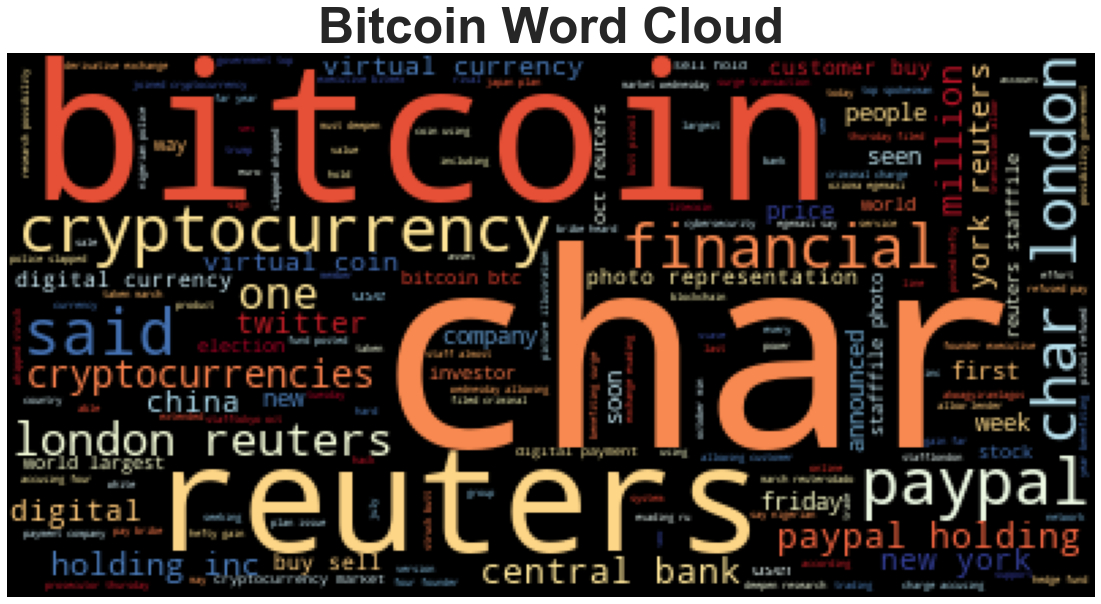

In [30]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_btc_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

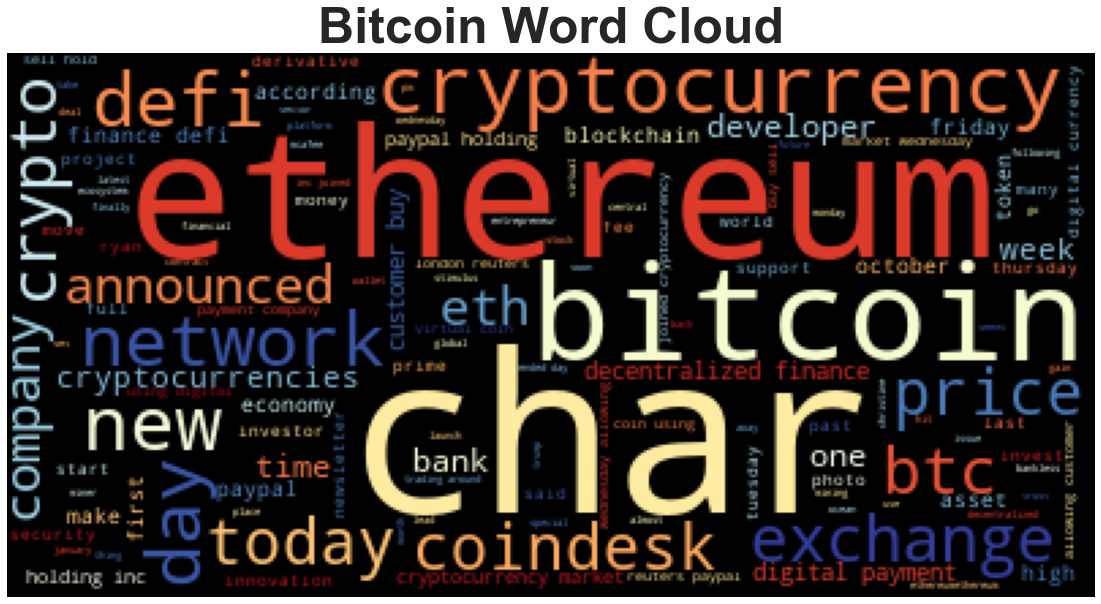

In [31]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_eth_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

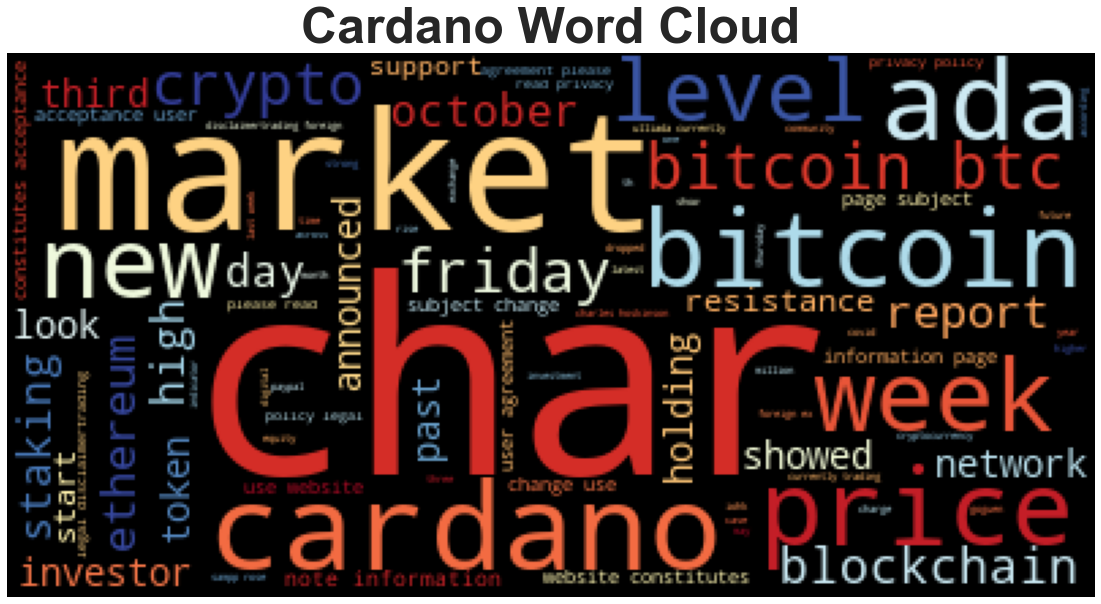

In [32]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_ada_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Cardano Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy


In [34]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [36]:
# Concatenate all of the bitcoin text together
flat_btc_text_str = " ".join(btc_df.text.to_list())
print(flat_btc_text_str)

NEW YORK (Reuters) - U.S. prosecutors on Thursday filed criminal charges accusing four founders and executives of BitMEX, one of the worlds largest cryptocurrency derivatives exchanges, of evading ru… [+2264 chars] BitMEX made itself available as a vehicle for money laundering and sanctions violations, the indictment released on Thursday said.
BitMEX has handled more than $1.5 billion of trades each day recent… [+963 chars] Reactions to Coinbase CEO Brian Armstrong's hard line against corporate activism at his company set off infighting among tech figures Wednesday who disagreed over whether Armstrong's stance was neces… [+4658 chars] NEW YORK (Reuters) - U.S. prosecutors on Thursday filed criminal charges accusing four founders and executives of BitMEX, one of the worlds largest cryptocurrency derivatives exchanges, of evading ru… [+2264 chars] US President Donald Trump and First Lady Melania Trump in the White House on July 7, 2020.
JIM WATSON/AFP via Getty Images
Global equity marke

In [37]:
# Run the NER processor on all of the text
btc_doc = nlp(flat_btc_text_str)
btc_doc.user_data["title"] = "Bitcoin NER"
# Add a title to the document

In [38]:
# Render the visualization
displacy.render(btc_doc,style='ent')

In [39]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

NEW YORK GPE
Reuters ORG
U.S. GPE
Thursday DATE
four CARDINAL
BitMEX ORG
one CARDINAL
Thursday DATE
BitMEX ORG
more than $1.5 billion MONEY
each day DATE
+963 ORG
Brian Armstrong's PERSON
Wednesday DATE
Armstrong ORG
NEW YORK GPE
Reuters ORG
U.S. GPE
Thursday DATE
four CARDINAL
BitMEX ORG
one CARDINAL
US GPE
Donald Trump PERSON
Melania Trump PERSON
the White House FAC
July 7, 2020 DATE
JIM WATSON/AFP ORG
Getty Images ORG
Friday DATE
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
FRANKFURT ORG
Reuters ORG
The European Central Bank ORG
ECB ORG
Fabio Panetta PERSON
Friday DATE
FILE ORG
NEW YORK GPE
Reuters ORG
U.S. GPE
Thursday DATE
four CARDINAL
BitMEX ORG
one CARDINAL
Reuters ORG
FRANKFURT ORG
Reuters ORG
The European Central Bank ORG
ECB ORG
Fabio Panetta PERSON
one CARDINAL
John McAfee PERSON
two CARDINAL
Reuters ORG
LONDON GPE
Reuters ORG
Britains NORP
Tuesday DATE
Bitcoin PERSON
LONDON PERSON
Reuters ORG
Britains NORP
Tues

---

## Ethereum NER

In [40]:
# Concatenate all of the bitcoin text together
#
# https://spacy.io/usage/visualizers
# colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
# options = {"ents": ["ORG"], "colors": colors}
# displacy.serve(doc, style="ent", options=options)
#
flat_eth_text_str = " ".join(eth_df.text.to_list())
#print(flat_eth_text_str)
eth_doc = nlp(flat_eth_text_str)
eth_doc.user_data["title"] = "Ethereum NER"
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(eth_doc,style='ent', options=options)

In [41]:
# Run the NER processor on all of the text

# Add a title to the document

# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Sparkpool ORG
Taichi Network ORG
October DATE
CoinDesk ORG
Sparkpool ORG
Xin Xu PERSON
Reuters ORG
U.S. GPE
Wednesday DATE
U.S. GPE
Alvin H PERSON
BitMEXs DATE
U.S. GPE
DeFi PERSON
Ethereum LOC
Bitcoin PERSON
BTC ORG
around $10,582 MONEY
Reuters ORG
U.S. GPE
Wednesday DATE
SKALE ORG
Ethereum PRODUCT
two CARDINAL
Thursday DATE
Yuriko Nakao PERSON
Getty Images ORG
Yesterday DATE
today DATE
Bitcoin PERSON
Ethereum PRODUCT
second ORDINAL
Ethereum 2.0 PRODUCT
first ORDINAL
Spadina GPE
Danny Ryan PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
ETHOnline NORP
Friday afternoon TIME
Devcons ORG
Ethereum LOC
CFTC ORG
DOJ ORG
Thursday DATE
the derivatives exchange ORG
US GPE
Donald Trump PERSON
Melania Trump PERSON
the White House FAC
July 7, 2020 DATE
JIM WATSON/AFP ORG
Getty Images ORG
Friday DATE
Ethereum 2.0 PRODUCT
CoinDesk PRODUCT
Christine Kim PERSON
Cayman Nava PERSON
ChainSafe Systems and Alexey Akhunov ORG
+3614 CARDINAL

## Cardano NER

In [45]:
# Concatenate all of the bitcoin text together
#
# https://spacy.io/usage/visualizers
# colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
# options = {"ents": ["ORG"], "colors": colors}
# displacy.serve(doc, style="ent", options=options)
#
flat_ada_text_str = " ".join(ada_df.text.to_list())
# print(flat_ada_text_str)
ada_doc = nlp(flat_ada_text_str)
ada_doc.user_data["title"] = "Cardano NER"
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(ada_doc,style='ent', options=options)

In [46]:
# Run the NER processor on all of the text

# Add a title to the document

# List all Entities
for ent in ada_doc.ents:
    print(ent.text, ent.label_)

eToro ORG
Shopify ORG
Cardano ORG
Cardano ORG
ADA ORG
U.S. GPE
three CARDINAL
the past few days DATE
eToro ORG
14 million CARDINAL
today DATE
Cardano (AD ORG
Yesterday DATE
eToro ORG
14 million CARDINAL
Cardan NORP
Good afternoon TIME
S&amp;P 500 FAC
the week DATE
3,348 CARDINAL
Friday DATE
evening TIME
last week DATE
600 CARDINAL
the week DATE
3,348 CARDINAL
Friday DATE
evening TIME
last week DATE
600 CARDINAL
Bitcoin PERSON
11k MONEY
third ORDINAL
Last Thursday DATE
U.S. GPE
Bitcoin PERSON
11k MONEY
third ORDINAL
Last Thursday DATE
U.S. GPE
DeFi FAC
@cryptopigmedia ORG
Curve Finance PERSON
CRV ORG
93% PERCENT
DeFi WORK_OF_ART
Yearn Fina PERSON
ARK Investment Management LLC ORG
BTC ORG
$1-$5 trillion MONEY
first ORDINAL
second ORDINAL
June 2020 DATE
Tim Burgess PERSON
Rishi Sunak PERSON
millions CARDINAL
8 October DATE
Ravi Somaiya PERSON
Ethereum’s ORG
DappRadar PRODUCT
the third quarter of 2020 DATE
Ethereum ORG
96% PERCENT
DappRadar ORG
the third quarter of 2020 DATE
Ethereum ORG
9